# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("b1abb33c4f.csv")

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [18]:
df.loc[(df['APGAR5'] > 0) & (df['APGAR5'] <= 3), 'Nível de Asfixia'] = 'asfixia moderada'
df.loc[(df['APGAR5'] > 4) & (df['APGAR5'] <= 5), 'Nível de Asfixia'] = 'asfixia moderada'
df.loc[(df['APGAR5'] > 6) & (df['APGAR5'] <= 7), 'Nível de Asfixia'] = 'asfixia leve'
df.loc[(df['APGAR5'] > 8) & (df['APGAR5'] <= 10), 'Nível de Asfixia'] = 'normal'

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

<AxesSubplot:xlabel='APGAR5', ylabel='count'>

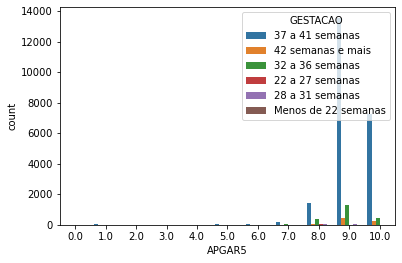

In [19]:
sns.countplot(x="APGAR5"
             ,hue="GESTACAO"
             ,data=df
             )

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

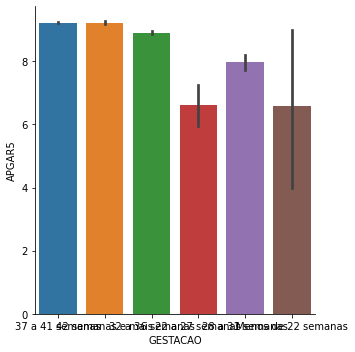

In [20]:
sns.catplot(x="GESTACAO"
            ,y="APGAR5"
            ,kind="bar"
            ,data=df
            )

####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5,,,,,,
0.0,0.437500,0.000000,0.125000,0.312500,0.062500,0.062500
1.0,0.000000,0.000000,0.090909,0.909091,0.000000,0.000000
2.0,0.500000,0.125000,0.125000,0.187500,0.000000,0.062500
3.0,0.428571,0.071429,0.142857,0.357143,0.000000,0.000000
4.0,0.047619,0.238095,0.380952,0.333333,0.000000,0.000000
5.0,0.000000,0.175000,0.275000,0.525000,0.025000,0.000000
6.0,0.027778,0.097222,0.236111,0.625000,0.013889,0.000000
7.0,0.042735,0.047009,0.239316,0.645299,0.021368,0.004274
8.0,0.012579,0.031971,0.189727,0.742662,0.023061,0.000000


<AxesSubplot:xlabel='APGAR5'>

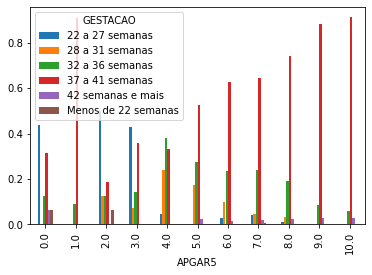

In [21]:
freq = pd.crosstab(df["APGAR5"], df["GESTACAO"])
freq_pct = freq.div(freq.sum(axis=1), axis=0)
display(freq_pct)
freq_pct.plot.bar()

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<AxesSubplot:xlabel='GESTACAO', ylabel='count'>

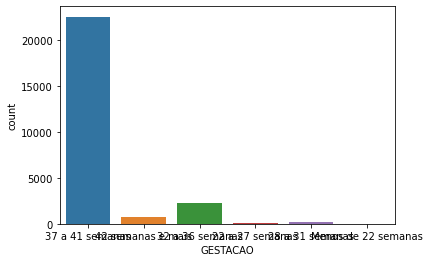

In [24]:
sns.countplot(x="GESTACAO"
             ,data=df
             )

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

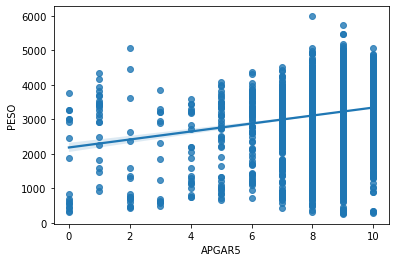

In [22]:
df_regre = sns.regplot(data= df, x ="APGAR5", y="PESO")